In [312]:
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import pandas as pd
import numpy as np

#Packages related to data visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

#Package Related to warnings
import warnings 
warnings.filterwarnings("ignore")

#Modules related to split the data 
from sklearn.model_selection import train_test_split 

#Module related to Pipeline Creation
from sklearn.pipeline import Pipeline

##Moudles related to feature selection
from sklearn.feature_selection import SelectKBest ,f_classif

##Moudles related to feature scaleing
from sklearn.preprocessing import MinMaxScaler , RobustScaler
#Modules related key techniques of supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Modules related to evaluation metrices
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score ,classification_report ,recall_score

## Data Preparation

In [317]:
t1=pd.read_csv("Data_of_Attack_Back.csv")
## Create Y Multinomial variable
t1['Attack_type']="unknown"

In [318]:
t2=pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
t2['Attack_type']="BufferOverflow"

t3=pd.read_csv("Data_of_Attack_Back_FTPWrite.csv")
t3['Attack_type']="FTPWrite"

t4=pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
t4['Attack_type']="GuessPassword"

t5=pd.read_csv("Data_of_Attack_Back_Neptune.csv")
t5['Attack_type']="Neptune"

t6=pd.read_csv("Data_of_Attack_Back_NMap.csv")
t6['Attack_type']="NMap"

t7=pd.read_csv("Data_of_Attack_Back_Normal.csv")
t7['Attack_type']="Normal"

t8=pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
t8['Attack_type']="PortSweep"

t9=pd.read_csv("Data_of_Attack_Back_RootKit.csv")
t9['Attack_type']="RootKit"

t10=pd.read_csv("Data_of_Attack_Back_Satan.csv")
t10['Attack_type']="Satan"

t11=pd.read_csv("Data_of_Attack_Back_Smurf.csv")
t11['Attack_type']="Smurf"

#Created a flag for normal vs attack activity
# Create Y Binomial variable
# 0 --> Normal , 1--> Attack
t7['attack_flag']=0

df=pd.concat([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11],axis=0)

df.fillna(1,inplace=True)


In [319]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_type,attack_flag
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,unknown,1.0
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,unknown,1.0
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,unknown,1.0
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,unknown,1.0
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,unknown,1.0


In [320]:
df['Attack_type'].value_counts()

Attack_type
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
unknown              968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               8
Name: count, dtype: int64

#### The above dataset is imbalanced. Some classes have very low number of records.

In [321]:
#To balance the the data set putting some low classes in single merged class
dim={'unknown':6,
 'BufferOverflow':6,
 'FTPWrite':6,
 'GuessPassword':6,
 'Neptune':1,
 'NMap':5,
 'Normal':0,
 'PortSweep':4,
 'RootKit':6,
 'Satan':2,
 'Smurf':3,
     }

In [322]:
df['Attack_coded']=df['Attack_type'].map(dim)

In [323]:
pd.DataFrame(df.std(numeric_only=True),columns=['std']).sort_values(by=['std'],ascending=True).head()

,std
num_outbound_cmds,0.000000
land,0.000000
is_host_login,0.000111
wrong_fragment,0.000332
urgent,0.000805


#### Remove  column with no Standard deviation  as per above analysis as columns with low std provide very less information.

In [324]:
df.drop(["num_outbound_cmds","land",'is_host_login','wrong_fragment'],axis=1,inplace=True)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817551 entries, 0 to 3006
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   urgent                       817551 non-null  float64
 7   hot                          817551 non-null  float64
 8   num_failed_logins            817551 non-null  float64
 9   logged_in                    817551 non-null  float64
 10  num_compromised              817551 non-null  float64
 11  root_shell                   817551 non-null  float64
 12  su_attempted                 817551 non-null  float64
 13  num_ro

In [326]:
df_num=df.select_dtypes(exclude='object')

In [327]:
c1=pd.DataFrame(df_num.corrwith(df_num['attack_flag']).abs().sort_values(ascending=False))

In [328]:
c1

,0
attack_flag,1.000000
same_srv_rate,0.965912
flag,0.951718
dst_host_same_srv_rate,0.902920
dst_host_srv_serror_rate,0.888492
srv_error_rate,0.887411
dst_host_serror_rate,0.887263
serror_rate,0.886822
dst_host_srv_count,0.854154
logged_in,0.852164


In [329]:
c1.loc[c1[0]<0.1].index

Index(['src_bytes', 'protocol_type', 'num_access_files', 'is_guest_login',
       'num_root', 'hot', 'srv_count', 'num_file_creations', 'duration',
       'num_shells', 'root_shell', 'num_compromised', 'su_attempted',
       'num_failed_logins', 'urgent'],
      dtype='object')

In [330]:
#Removeing columns ehich have very low corrlation with target variable.
df.drop(c1.loc[c1[0]<0.1].index,axis=1,inplace=True)

In [331]:
df.columns

Index(['service', 'flag', 'dst_bytes', 'logged_in', 'count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack_type', 'attack_flag',
       'Attack_coded'],
      dtype='object')

In [332]:
y_binomial=df['attack_flag']
y_multinomial=df['Attack_coded']

In [333]:
df.drop(['attack_flag','Attack_type','Attack_coded'],axis=1,inplace =True)

## Binomial Classification

In [334]:
X_train, X_test, y_train, y_test = train_test_split(df, y_binomial, test_size=0.33, random_state=42)

In [335]:
lr=LogisticRegression()
knc=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')

In [336]:
skf=SelectKBest(f_classif,k=10)

In [337]:
p1=Pipeline(steps=[
    ('Scaling',RobustScaler()), #RobustScaler is a useful scaling technique when dealing with datasets that contain outliers 
    ('Feature Selection',skf),
    ('Logestic Regression',lr)
])

In [341]:
p2=Pipeline(steps=[
    ('Scaling',RobustScaler()),
    ('Feature Selection',skf),
    ('RandomForest Classifier',rfc)
])

In [338]:
p1.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('Logestic Regression', LogisticRegression())])

In [339]:
train_preds_pipe1 = p1.predict(X_train)
test_preds_pipe1 = p1.predict(X_test)

In [340]:
print("Accuracy train pipe1 :: ",accuracy_score(train_preds_pipe1, y_train))
print("Accuracy test pipe1 :: ",accuracy_score(test_preds_pipe1, y_test))
print("Precision train pipe1 :: ",precision_score(train_preds_pipe1, y_train))
print("Precision test pipe1 :: ",precision_score(test_preds_pipe1, y_test))
print("Recall train pipe1 :: ",recall_score(train_preds_pipe1, y_train))
print("Recall test pipe1 :: ",recall_score(test_preds_pipe1, y_test))

Accuracy train pipe1 ::  0.9938750435866869
Accuracy test pipe1 ::  0.9939842545368284
Precision train pipe1 ::  0.9827311749366665
Precision test pipe1 ::  0.9830087915963422
Recall train pipe1 ::  0.9964390237775238
Recall test pipe1 ::  0.9965014875062246


In [342]:
print("Train Classification Report of LogisticRegression \n")
print(classification_report(train_preds_pipe1,y_train))

Train Classification Report of LogisticRegression 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    388533
         1.0       0.98      1.00      0.99    159226

    accuracy                           0.99    547759
   macro avg       0.99      0.99      0.99    547759
weighted avg       0.99      0.99      0.99    547759



In [343]:
print("Test Classification Report of LogisticRegression \n")
print(classification_report(test_preds_pipe1,y_test))

Test Classification Report of LogisticRegression 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    191473
         1.0       0.98      1.00      0.99     78319

    accuracy                           0.99    269792
   macro avg       0.99      0.99      0.99    269792
weighted avg       0.99      0.99      0.99    269792



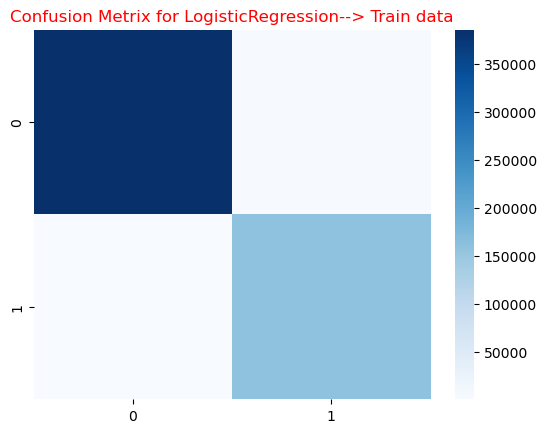

In [344]:
sns.heatmap(data=confusion_matrix(train_preds_pipe1, y_train),cmap='Blues')
plt.title("Confusion Metrix for LogisticRegression--> Train data",c='r')
plt.show()

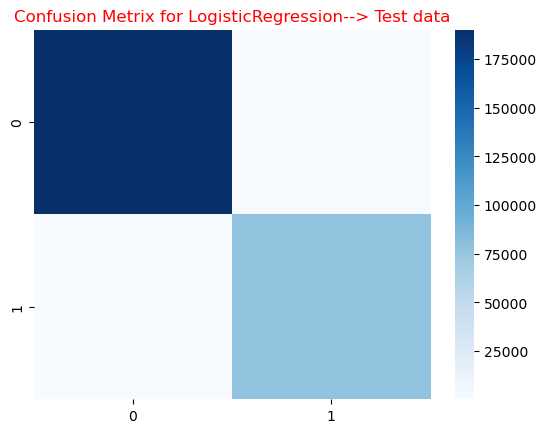

In [345]:
sns.heatmap(data=confusion_matrix(test_preds_pipe1,y_test),cmap='Blues')
plt.title("Confusion Metrix for LogisticRegression--> Test data",c='r')
plt.show()

In [346]:
p2.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('RandomForest Classifier', RandomForestClassifier())])

In [347]:
train_preds_pipe2 = p2.predict(X_train)
test_preds_pipe2 = p2.predict(X_test)

In [348]:
print("Accuracy train pipe2 :: ",accuracy_score(train_preds_pipe2, y_train))
print("Accuracy test pipe2 :: ",accuracy_score(test_preds_pipe2, y_test))
print("Precision train pipe2 :: ",precision_score(train_preds_pipe2, y_train))
print("Precision test pipe2 :: ",precision_score(test_preds_pipe2, y_test))
print("Recall train pipe2 :: ",recall_score(train_preds_pipe2, y_train))
print("Recall test pipe2 :: ",recall_score(test_preds_pipe2, y_test))

Accuracy train pipe2 ::  0.997376583497487
Accuracy test pipe2 ::  0.9963490392598743
Precision train pipe2 ::  0.992251327060893
Precision test pipe2 ::  0.9907423734791042
Recall train pipe2 ::  0.9988402688581013
Recall test pipe2 ::  0.9968317935850156


In [349]:
print("Train Classification Report of RandomForestClassifier \n")
print(classification_report(train_preds_pipe2,y_train))

Train Classification Report of RandomForestClassifier 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    387377
         1.0       0.99      1.00      1.00    160382

    accuracy                           1.00    547759
   macro avg       1.00      1.00      1.00    547759
weighted avg       1.00      1.00      1.00    547759



In [350]:
print("Test Classification Report of RandomForestClassifier\n")
print(classification_report(test_preds_pipe2,y_test))

Test Classification Report of RandomForestClassifier

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    190883
         1.0       0.99      1.00      0.99     78909

    accuracy                           1.00    269792
   macro avg       0.99      1.00      1.00    269792
weighted avg       1.00      1.00      1.00    269792



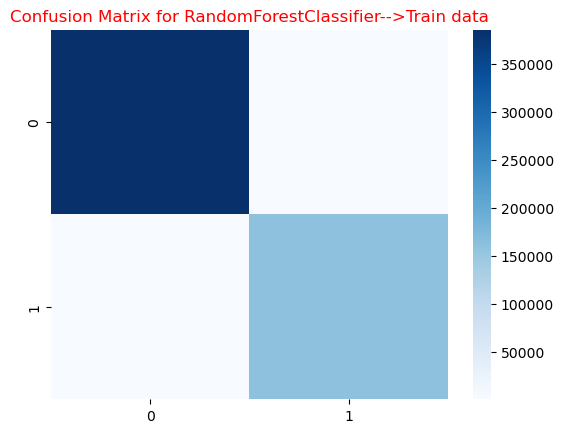

In [351]:
sns.heatmap(data=confusion_matrix(train_preds_pipe2, y_train),cmap='Blues')
plt.title("Confusion Matrix for RandomForestClassifier-->Train data",c='r')
plt.show()

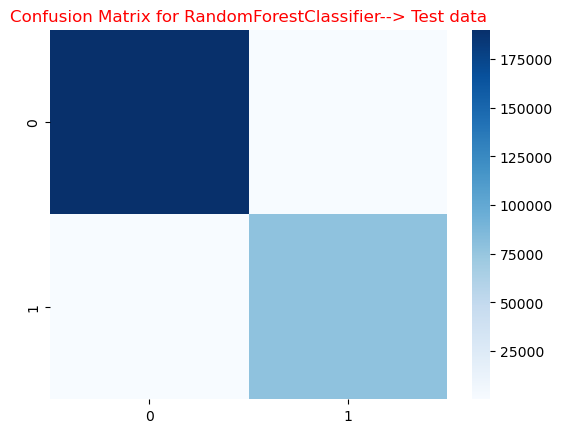

In [352]:
sns.heatmap(data=confusion_matrix(test_preds_pipe2,y_test),cmap='Blues')
plt.title("Confusion Matrix for RandomForestClassifier--> Test data",c='r')
plt.show()

#### Both pipelines seem to perform very well, as they have high accuracy, precision, and recall on both the training and test sets. However, Pipe2(RandomForest Classifier) generally has slightly higher accuracy, precision, and recall values compared to Pipe1(LogisticRegression) on both the training and test sets.Therefore using Pipe2(RandomForest Classifier) for making pridictions.

In [353]:
pred=pd.DataFrame(p2.predict(df))

In [354]:
df['Pred_attack_flag']=pred

### Multinomial Classification 

In [355]:
X_train, X_test, y_train, y_test = train_test_split(df, y_multinomial, test_size=0.33, random_state=42)

In [356]:
rfc=RandomForestClassifier()
adab=AdaBoostClassifier()

In [357]:
p3=Pipeline(steps=[
    ('Scaling',RobustScaler()), #RobustScaler is a useful scaling technique when dealing with datasets that contain outliers 
    ('Feature Selection',skf),
    ('RandomForestClassifier',rfc)
    ])

In [358]:
p4=Pipeline(steps=[
    ('Scaling',RobustScaler()),
    ('Feature Selection',skf),
    ('AdaBoostClassifier',adab)
    ])

In [359]:
p3.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [360]:
train_preds_pipe3 = p3.predict(X_train)
test_preds_pipe3 = p3.predict(X_test)

In [361]:
print("Accuracy train pipe3 :: ",accuracy_score(train_preds_pipe3, y_train))
print("Accuracy test pipe3 :: ",accuracy_score(test_preds_pipe3, y_test))
print("Precision train pipe3 :: ",precision_score(train_preds_pipe3, y_train,average=None))
print("Precision test pipe3 :: ",precision_score(test_preds_pipe3, y_test,average=None))
print("Recall train pipe3 :: ",recall_score(train_preds_pipe3, y_train,average=None))
print("Recall test pipe3 :: ",recall_score(test_preds_pipe3, y_test,average=None))

Accuracy train pipe3 ::  0.9971356016058157
Accuracy test pipe3 ::  0.9960451014114577
Precision train pipe3 ::  [0.99952629 0.99996717 0.98192771 0.83169291 0.94358462 0.69886364
 0.24828532]
Precision test pipe3 ::  [0.99876049 0.99973305 0.95585639 0.80820513 0.93756504 0.57831325
 0.17941176]
Recall train pipe3 ::  [0.99676289 0.99933728 0.98698153 0.99004101 0.99421357 0.85121107
 0.92820513]
Recall test pipe3 ::  [0.99611845 0.99930623 0.96494355 0.96450428 0.97090517 0.71820449
 0.57009346]


In [362]:
print("Classification Report of RandomForestClassifier --> Train")
print(classification_report(train_preds_pipe3,y_train))

Classification Report of RandomForestClassifier --> Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387383
           1       1.00      1.00      1.00    152403
           2       0.98      0.99      0.98      3303
           3       0.83      0.99      0.90      1707
           4       0.94      0.99      0.97      1901
           5       0.70      0.85      0.77       867
           6       0.25      0.93      0.39       195

    accuracy                           1.00    547759
   macro avg       0.81      0.96      0.86    547759
weighted avg       1.00      1.00      1.00    547759



In [363]:
print("Classification Report of RandomForestClassifier --> Test")
print(classification_report(test_preds_pipe3,y_test))

Classification Report of RandomForestClassifier --> Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190903
           1       1.00      1.00      1.00     74953
           2       0.96      0.96      0.96      1683
           3       0.81      0.96      0.88       817
           4       0.94      0.97      0.95       928
           5       0.58      0.72      0.64       401
           6       0.18      0.57      0.27       107

    accuracy                           1.00    269792
   macro avg       0.78      0.88      0.81    269792
weighted avg       1.00      1.00      1.00    269792



In [364]:
print("Confusion Matrix for RandomForestClassifier-->Train")
confusion_matrix(train_preds_pipe3,y_train)

Confusion Matrix for RandomForestClassifier-->Train


array([[386129,      0,     53,    334,      2,    318,    547],
       [     0, 152302,      1,      0,    100,      0,      0],
       [    24,      0,   3260,      8,     11,      0,      0],
       [    16,      0,      1,   1690,      0,      0,      0],
       [     2,      5,      4,      0,   1890,      0,      0],
       [   127,      0,      1,      0,      0,    738,      1],
       [    14,      0,      0,      0,      0,      0,    181]],
      dtype=int64)

In [365]:
p4.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('AdaBoostClassifier', AdaBoostClassifier())])

In [366]:
train_preds_pipe4 = p4.predict(X_train)
test_preds_pipe4 = p4.predict(X_test)

In [367]:
print("Accuracy train pipe4 :: ",accuracy_score(train_preds_pipe4, y_train))
print("Accuracy test pipe4 :: ",accuracy_score(test_preds_pipe4, y_test))
print("Precision train pipe4 :: ",precision_score(train_preds_pipe4, y_train,average=None))
print("Precision test pipe4 :: ",precision_score(test_preds_pipe4, y_test,average=None))
print("Recall train pipe4 :: ",recall_score(train_preds_pipe4, y_train,average=None))
print("Recall test pipe4 :: ",recall_score(test_preds_pipe4, y_test,average=None))

Accuracy train pipe4 ::  0.9835821958196944
Accuracy test pipe4 ::  0.9836170086585221
Precision train pipe4 ::  [0.99845979 0.99976364 0.23433735 0.         0.         0.
 0.        ]
Precision test pipe4 ::  [0.99844011 0.99989322 0.21071218 0.         0.         0.
 0.        ]
Recall train pipe4 ::  [0.98582287 0.98036325 0.66552609 0.         0.         0.
 0.        ]
Recall test pipe4 ::  [0.98613914 0.97949818 0.66791045 0.         0.         0.
 0.        ]


In [368]:
print("Classification Report of AdaBoostClassifier --> Train")
print(classification_report(train_preds_pipe4,y_train))

Classification Report of AdaBoostClassifier --> Train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    391264
           1       1.00      0.98      0.99    155321
           2       0.23      0.67      0.35      1169
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         0

    accuracy                           0.98    547759
   macro avg       0.32      0.38      0.33    547759
weighted avg       1.00      0.98      0.99    547759



In [369]:
print("Classification Report of RandomForestClassifier --> Test")
print(classification_report(test_preds_pipe4,y_test))

Classification Report of RandomForestClassifier --> Test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    192773
           1       1.00      0.98      0.99     76481
           2       0.21      0.67      0.32       536
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0

    accuracy                           0.98    269792
   macro avg       0.32      0.38      0.33    269792
weighted avg       1.00      0.98      0.99    269792



In [370]:
print("Confusion Matrix for AdaBoostClassifier-->Train")
confusion_matrix(train_preds_pipe4,y_train)

Confusion Matrix for AdaBoostClassifier-->Train


array([[385717,     36,    473,   2032,   1325,   1012,    669],
       [   201, 152271,   2069,      0,    678,     43,     59],
       [   390,      0,    778,      0,      0,      1,      0],
       [     0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0],
       [     4,      0,      0,      0,      0,      0,      1],
       [     0,      0,      0,      0,      0,      0,      0]],
      dtype=int64)

In [371]:
print("Confusion Matrix for AdaBoostClassifier-->Test")
confusion_matrix(test_preds_pipe4,y_test)

Confusion Matrix for AdaBoostClassifier-->Test


array([[190101,      8,    252,    975,    645,    484,    308],
       [   117,  74913,   1089,      0,    316,     14,     32],
       [   178,      0,    358,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0],
       [     2,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0]],
      dtype=int64)

#### Pipe3(RandomForestClassifier) has higher accuracy, precision, and recall values compared to Pipe4(AdaBoostClassifier) on both the training and test sets. Therefore using Pipe3(RandomForestClassifier) for prediction.

In [372]:
pred=pd.DataFrame(p3.predict(df))

In [304]:
df['Pred_attack_coded']=pred

In [305]:
df['Attack_flag']=y_binomial

In [306]:
df['Attack_coded']=y_multinomial

In [308]:
df

,service,flag,dst_bytes,logged_in,count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Pred_attack_flag,Pred_attack_coded,Attack_flag,Attack_coded
0,0.00,0.0,0.08314,0.1,0.001,0.0,0.0,0.0,0.050,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,6
1,0.00,0.0,0.08314,0.1,0.002,0.0,0.0,0.0,0.033,0.1,...,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,6
2,0.00,0.0,0.08314,0.1,0.003,0.0,0.0,0.0,0.025,0.1,...,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,6
3,0.00,0.0,0.08314,0.1,0.004,0.0,0.0,0.0,0.000,0.1,...,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,6
4,0.00,0.0,0.08314,0.1,0.004,0.0,0.0,0.0,0.000,0.1,...,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.09,0.0,0.00000,0.0,0.251,0.0,0.0,0.0,0.000,0.1,...,0.098,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,3
3003,0.09,0.0,0.00000,0.0,0.252,0.0,0.0,0.0,0.000,0.1,...,0.099,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,3
3004,0.09,0.0,0.00000,0.0,0.253,0.0,0.0,0.0,0.000,0.1,...,0.099,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,3
3005,0.09,0.0,0.00000,0.0,0.254,0.0,0.0,0.0,0.000,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,3
